In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [2]:
df = pd.read_csv('/Users/alexaowen/Documents/Fourth Year/Spring 2023/DS 4002/Project 3/GlobalLandTemperatures_GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['dt'] > '1849-12-01']
df.set_index('dt', inplace=True)
df
ts = df['LandAverageTemperature']
ts_1900 = ts.loc ['1850-01-01':'1900-12-01']
ts_1950 = ts.loc ['1901-01-01':'1950-12-01']
ts_2000 = ts.loc ['1951-01-01':'2000-12-01']
ts_2015 = ts.loc ['2001-01-01':'2015-12-01']

In [3]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [4]:
check_stationarity(ts)
check_stationarity(ts_1900)
check_stationarity(ts_1950)
check_stationarity(ts_2000)
check_stationarity(ts_2015)

The series is NOT stationary
The series is stationary
The series is stationary
The series is stationary
The series is NOT stationary


In [5]:
ts_diff0 = pd.Series(ts_2015)
d = 0
while check_stationarity(ts_diff0) is False:
    ts_diff0 = ts_diff0.diff().dropna()
    d = d + 1

The series is NOT stationary


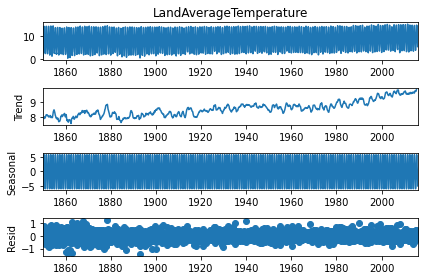

In [6]:
result = seasonal_decompose(ts,model='additive')
fig = result.plot()

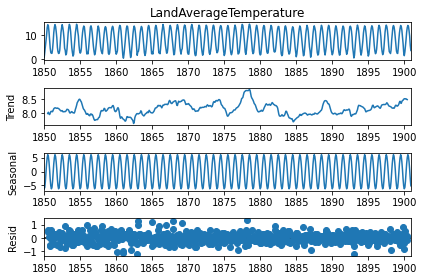

In [7]:
result = seasonal_decompose(ts_1900,model='additive')
fig = result.plot()

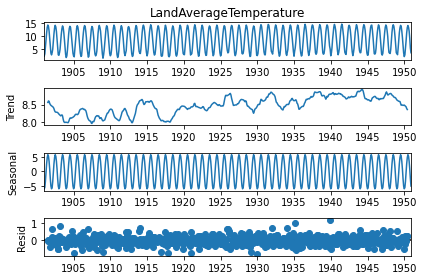

In [8]:
result = seasonal_decompose(ts_1950,model='additive')
fig = result.plot()

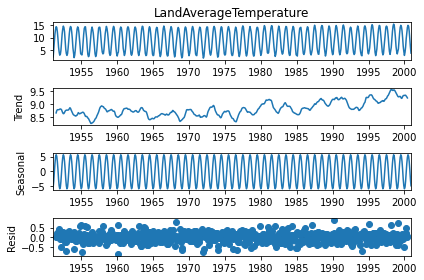

In [9]:
result = seasonal_decompose(ts_2000,model='additive')
fig = result.plot()

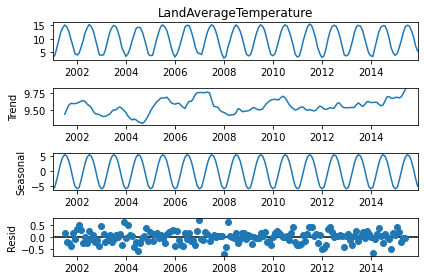

In [10]:
result = seasonal_decompose(ts_2015,model='additive')
fig = result.plot()

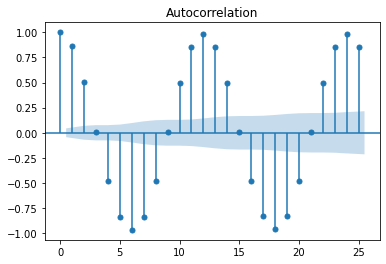

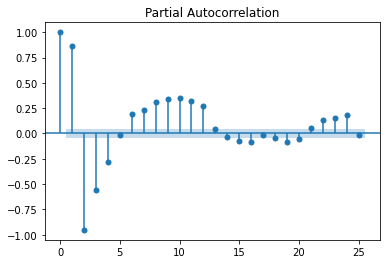

In [11]:
plot_acf(ts, lags=25);
plot_pacf(ts, lags=25);

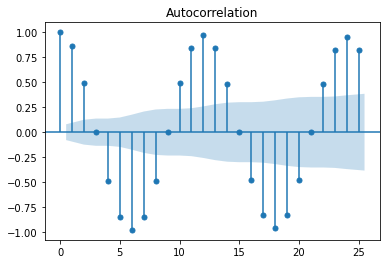

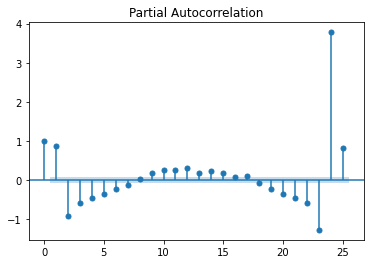

In [12]:
plot_acf(ts_1900, lags=25);
plot_pacf(ts_1900, lags=25);

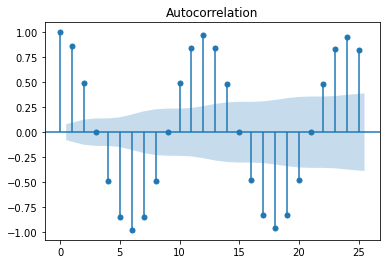

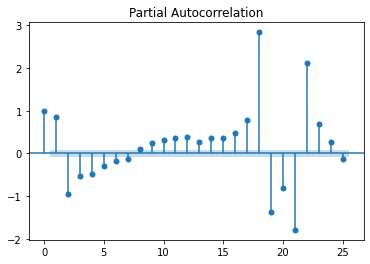

In [13]:
plot_acf(ts_1950, lags=25);
plot_pacf(ts_1950, lags=25);

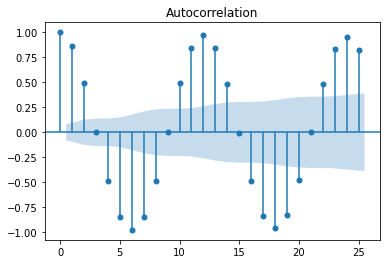

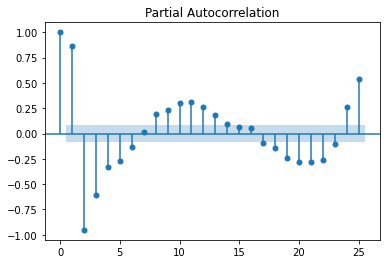

In [14]:
plot_acf(ts_2000, lags=25);
plot_pacf(ts_2000, lags=25);

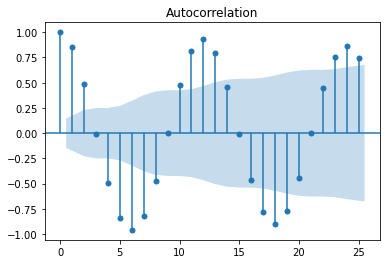

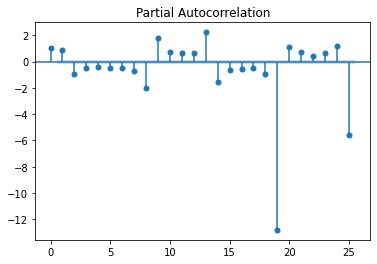

In [15]:
plot_acf(ts_2015, lags=25);
plot_pacf(ts_2015, lags=25);

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = 3
q = 5
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()

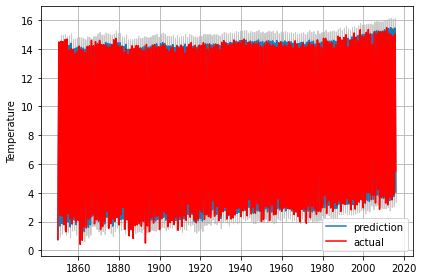

In [17]:
plt.plot(ts_p,label='prediction')
plt.plot(ts,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.grid()

In [26]:
p1 = 3
q1 = 9
model1 = SARIMAX(ts_1900, order=(p1,d,q1))
model_fit1 = model1.fit(disp=1,solver='powell')
    
fcast1 = model_fit1.get_prediction(start=1, end=len(ts_1900))
ts_p1 = fcast1.predicted_mean
ts_ci1 = fcast1.conf_int()

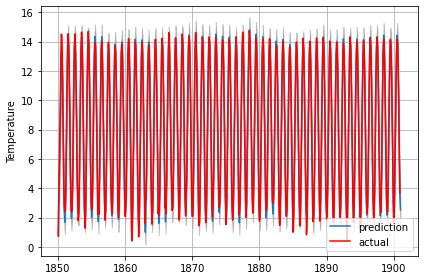

In [27]:
plt.plot(ts_p1,label='prediction')
plt.plot(ts_1900,color='red',label='actual')
plt.fill_between(ts_ci1.index[1:],
                ts_ci1.iloc[1:, 0],
                ts_ci1.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.grid()

In [30]:
p2 = 3
q2 = 8
model2 = SARIMAX(ts_1950, order=(p2,d,q2))
model_fit2 = model2.fit(disp=1,solver='powell')
    
fcast2 = model_fit2.get_prediction(start=1, end=len(ts_1950))
ts_p2 = fcast2.predicted_mean
ts_ci2 = fcast2.conf_int()

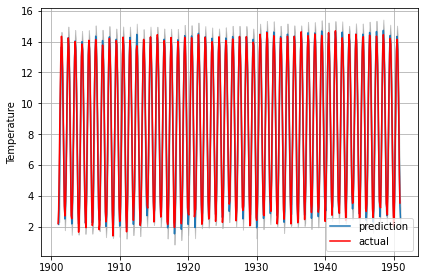

In [31]:
plt.plot(ts_p2,label='prediction')
plt.plot(ts_1950,color='red',label='actual')
plt.fill_between(ts_ci2.index[1:],
                ts_ci2.iloc[1:, 0],
                ts_ci2.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.grid()

In [39]:
p3 = 3
q3 = 7
model3 = SARIMAX(ts_2000, order=(p3,d,q3))
model_fit3 = model3.fit(disp=1,solver='powell')
    
fcast3 = model_fit3.get_prediction(start=1, end=len(ts_2000))
ts_p3 = fcast3.predicted_mean
ts_ci3 = fcast3.conf_int()

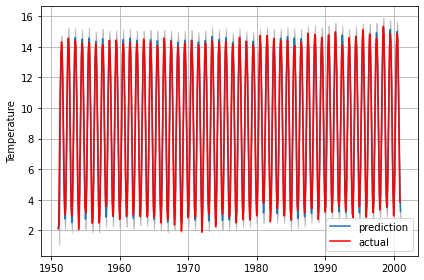

In [40]:
plt.plot(ts_p3,label='prediction')
plt.plot(ts_2000,color='red',label='actual')
plt.fill_between(ts_ci3.index[1:],
                ts_ci3.iloc[1:, 0],
                ts_ci3.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.grid()

In [34]:
p4 = 3
q4 = 25
model4 = SARIMAX(ts_2015, order=(p4,d,q4))
model_fit4 = model4.fit(disp=1,solver='powell')
    
fcast4 = model_fit4.get_prediction(start=1, end=len(ts_2015))
ts_p4 = fcast4.predicted_mean
ts_ci4 = fcast4.conf_int()

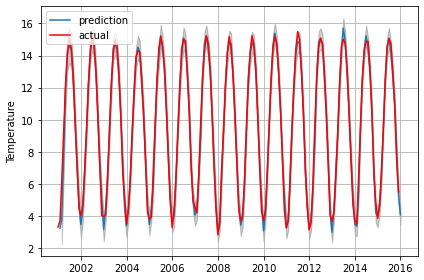

In [35]:
plt.plot(ts_p4,label='prediction')
plt.plot(ts_2015,color='red',label='actual')
plt.fill_between(ts_ci4.index[1:],
                ts_ci4.iloc[1:, 0],
                ts_ci4.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.grid()

In [41]:
from scipy import stats
stats.pearsonr(ts_p[1:], ts[1:])

residuals = ts - ts_p
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ts-np.mean(ts))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9925187863517945

In [42]:
stats.pearsonr(ts_p1[1:], ts_1900[1:])

residuals1 = ts_1900 - ts_p1
ss_res1 = np.sum(residuals1**2)
ss_tot1 = np.sum((ts_1900-np.mean(ts_1900))**2)
r_squared1 = 1 - (ss_res1 / ss_tot1)
r_squared1

0.9891864164746113

In [43]:
stats.pearsonr(ts_p2[1:], ts_1950[1:])

residuals2 = ts_1950 - ts_p2
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((ts_1950-np.mean(ts_1950))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)
r_squared2

0.9923203602687832

In [44]:
stats.pearsonr(ts_p3[1:], ts_2000[1:])

residuals3 = ts_2000 - ts_p3
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((ts_2000-np.mean(ts_2000))**2)
r_squared3 = 1 - (ss_res3 / ss_tot3)
r_squared3

0.9924933588233392

In [45]:
stats.pearsonr(ts_p4[1:], ts_2015[1:])

residuals4 = ts_2015 - ts_p4
ss_res4 = np.sum(residuals4**2)
ss_tot4 = np.sum((ts_2015-np.mean(ts_2015))**2)
r_squared4 = 1 - (ss_res4 / ss_tot4)
r_squared4

0.9909188967228185